In [3]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Load results

## synth results

In [4]:
path_to_data = '../recipes/echo_aware_processing/data/interim/'
files = glob(path_to_data + '*.csv')
results = pd.DataFrame()
for file in files:
    res = pd.read_csv(file)
    results = results.append(res)
    print(file)

../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-3_data-real_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-0_data-synt_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-1_data-real_dataset-3.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-0_data-synt_dataset-2.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-1_data-synt_dataset-5.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-0_data-real_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-2_data-synt_dataset-1.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-3_data-real_dataset-3.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-2_data-synt_dataset-3.csv
../recipes/echo_aware_processing/data/interim/2020-08-05_results_arr-1_data-synt_dataset-0.csv
../recipes/echo_aware_processing/data/interim/2020

In [5]:
results

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sar_out,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,dpDS,0.950520,2.676881,0.015687,-1.864098,6.268219,1.774523,0.441358,1.265489,1.769791
1,1,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,rtfMVDR,4.551803,2.676881,0.015687,-1.864098,0.710932,14.330222,0.526870,1.265489,1.349328
2,2,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,ecoMVDR,-10.049626,2.676881,0.015687,-1.864098,1.414174,29.052652,1.406555,1.265489,1.261215
3,3,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,rtfLCMV,4.062314,2.676881,0.015687,-1.864098,8.334117,10.490666,6.257806,1.265489,2.071184
4,4,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,ecoLCMV,-8.314503,2.676881,0.015687,-1.864098,3.315577,25.541475,3.289387,1.265489,2.030528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,3225,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,dpDS,-1.373558,22.721704,20.015687,18.152572,25.005486,24.955231,21.976587,2.528711,2.688821
3226,3226,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,rtfMVDR,3.618394,22.721704,20.015687,18.152572,39.175935,28.317072,27.981355,2.528711,3.126581
3227,3227,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,ecoMVDR,5.154276,22.721704,20.015687,18.152572,38.755770,29.905352,29.372577,2.528711,3.308191
3228,3228,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,rtfLCMV,4.072818,22.721704,20.015687,18.152572,37.165302,27.910638,27.426761,2.528711,3.041177


# Investigation

## Global metrics vs bf

In [6]:
results

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sar_out,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,dpDS,0.950520,2.676881,0.015687,-1.864098,6.268219,1.774523,0.441358,1.265489,1.769791
1,1,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,rtfMVDR,4.551803,2.676881,0.015687,-1.864098,0.710932,14.330222,0.526870,1.265489,1.349328
2,2,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,ecoMVDR,-10.049626,2.676881,0.015687,-1.864098,1.414174,29.052652,1.406555,1.265489,1.261215
3,3,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,rtfLCMV,4.062314,2.676881,0.015687,-1.864098,8.334117,10.490666,6.257806,1.265489,2.071184
4,4,real,3.0,0.0,0.0,1.0,0.0,0.0,0.0,ecoLCMV,-8.314503,2.676881,0.015687,-1.864098,3.315577,25.541475,3.289387,1.265489,2.030528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,3225,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,dpDS,-1.373558,22.721704,20.015687,18.152572,25.005486,24.955231,21.976587,2.528711,2.688821
3226,3226,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,rtfMVDR,3.618394,22.721704,20.015687,18.152572,39.175935,28.317072,27.981355,2.528711,3.126581
3227,3227,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,ecoMVDR,5.154276,22.721704,20.015687,18.152572,38.755770,29.905352,29.372577,2.528711,3.308191
3228,3228,synt,3.0,3.0,3.0,2.0,20.0,20.0,5.0,rtfLCMV,4.072818,22.721704,20.015687,18.152572,37.165302,27.910638,27.426761,2.528711,3.041177


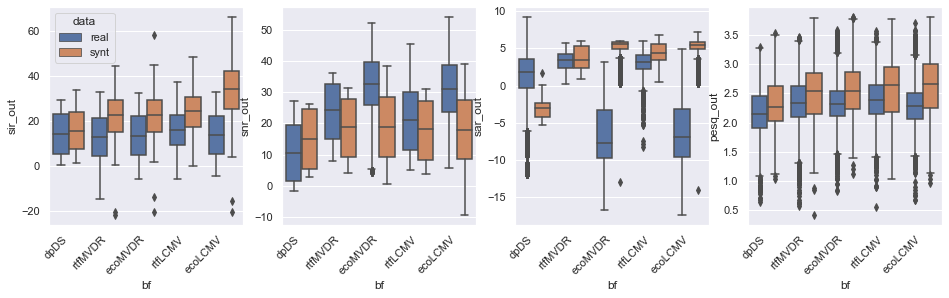

In [7]:
loc_res = results.copy()
# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
g = sns.boxplot(x='bf', y="sir_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(142)
g = sns.boxplot(x='bf', y="snr_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(143)
g = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()

plt.subplot(144)
g = sns.boxplot(x='bf', y="pesq_out", hue='data', data=loc_res)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.legend_.remove()
plt.show()

## Incemental metrics vs bf

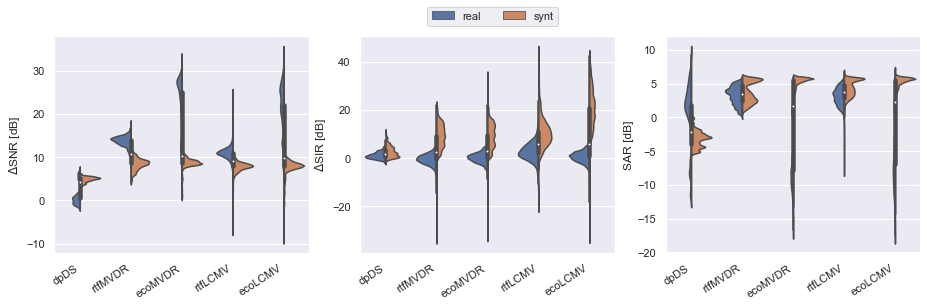

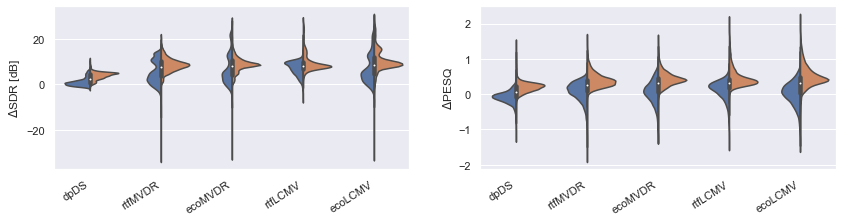

In [8]:
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']
# plot
plt.figure(figsize=(21,4))
plt.subplot(141)
g1 = sns.violinplot(x='bf', y="snr_inc", hue='data', data=loc_res, split=True)
g1.set_xticklabels(g1.get_xticklabels(), rotation=33, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta$SNR [dB]', xlabel='')

plt.subplot(142)
g2 = sns.violinplot(x='bf', y="sir_inc", hue='data', data=loc_res, split=True)
g2.set_xticklabels(g2.get_xticklabels(), rotation=33, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta$SIR [dB]', xlabel='')

plt.subplot(143)
g4 = sns.violinplot(x='bf', y="sar_out", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'SAR [dB]', xlabel='')

plt.savefig('../recipes/echo_aware_processing/bsseval_results_box.pdf', dpi=300)
plt.show()


plt.figure(figsize=(14,3))
plt.subplot(121)
g4 = sns.violinplot(x='bf', y="sdr_inc", hue='data', data=loc_res, split=True)
g4.set_xticklabels(g4.get_xticklabels(), rotation=33, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta$SDR [dB]', xlabel='')

plt.subplot(122)
g3 = sns.violinplot(x='bf', y="pesq_inc", hue='data', data=loc_res, split=True)
g3.set_xticklabels(g.get_xticklabels(), rotation=33, horizontalalignment='right')
g3.legend_.remove()
g3.set(ylabel=r'$\Delta$PESQ', xlabel='')
plt.savefig('../recipes/echo_aware_processing/pesq_results_violin.pdf', dpi=300)
plt.show()

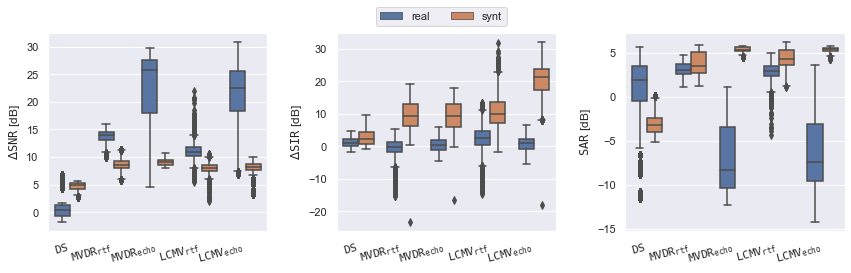

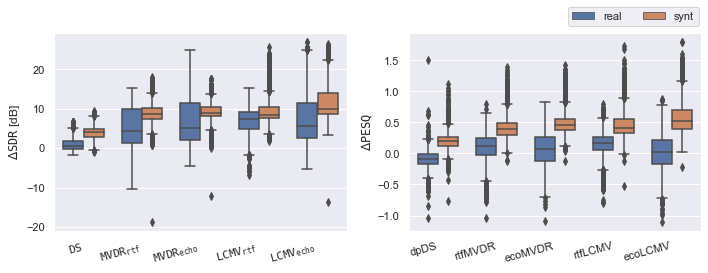

In [15]:
loc_res = results.copy()
loc_res = loc_res.loc[loc_res['dataset'] == 3]
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']

# beautiful plot
width = 0.7
angle = 15
loc_res = loc_res.replace('dpDS', value='$\mathtt{DS}$')
loc_res = loc_res.replace('rtfMVDR', value='$\mathtt{MVDR}_{\mathtt{rtf}}$')
loc_res = loc_res.replace('rtfLCMV', value='$\mathtt{LCMV}_{\mathtt{rtf}}$')
loc_res = loc_res.replace('ecoMVDR', value='$\mathtt{MVDR}_{\mathtt{echo}}$')
loc_res = loc_res.replace('ecoLCMV', value='$\mathtt{LCMV}_{\mathtt{echo}}$')

# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
g1 = sns.boxplot(x='bf', y="snr_inc", hue='data', data=loc_res, width=width)
g1.set_xticklabels(g1.get_xticklabels(), rotation=angle, horizontalalignment='right')
g1.legend_.remove()
g1.set(ylabel=r'$\Delta\mathtt{SNR}$ [dB]', xlabel='')

plt.subplot(142)
g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res, width=width)
g2.set_xticklabels(g2.get_xticklabels(), rotation=angle, horizontalalignment='right')
g2.legend_.remove()
g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
g2.set(ylabel=r'$\Delta\mathtt{SIR}$ [dB]', xlabel='')

plt.subplot(143)
g4 = sns.boxplot(x='bf', y="sar_out", hue='data', data=loc_res, width=width)
g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\mathtt{SAR}$ [dB]', xlabel='')
plt.tight_layout()
plt.savefig('../recipes/echo_aware_processing/bsseval_results_boxplot.pdf', dpi=300)
plt.show()


plt.figure(figsize=(10,4))
plt.subplot(121)
g4 = sns.boxplot(x='bf', y="sdr_inc", hue='data', data=loc_res, width=width)
g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
g4.legend_.remove()
g4.set(ylabel=r'$\Delta\mathtt{SDR}$ [dB]', xlabel='')

plt.subplot(122)
g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res, width=width)
g3.set_xticklabels(g.get_xticklabels(), rotation=angle, horizontalalignment='right')
g3.legend_.remove()
g3.legend(bbox_to_anchor=(0.51, 0.66, 0.5, 0.5), loc=1, ncol=2)
g3.set(ylabel=r'$\Delta\mathtt{PESQ}$', xlabel='')
plt.tight_layout()
plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
plt.show()

# Performance vs Dataset (~ RT60)

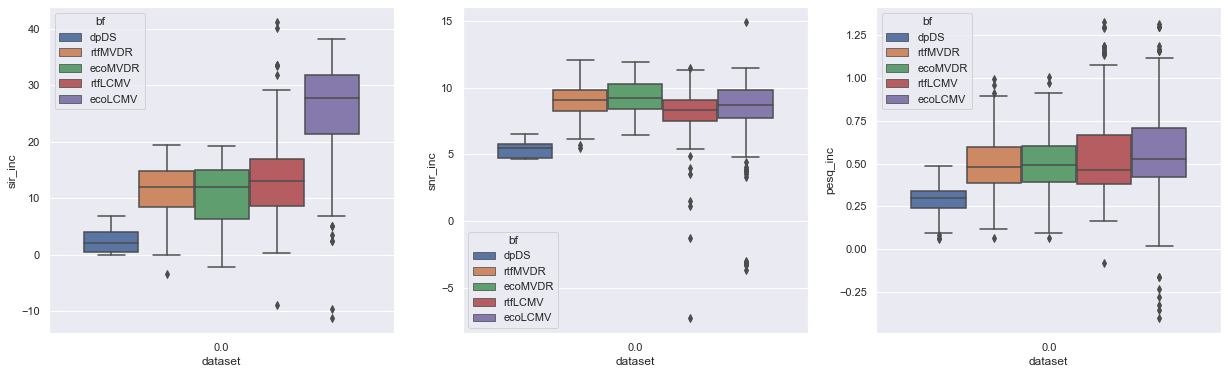

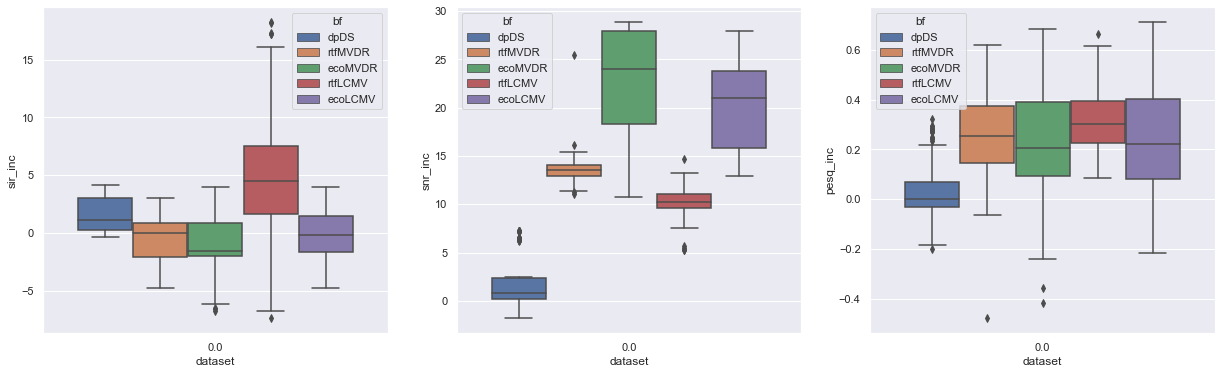

In [78]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


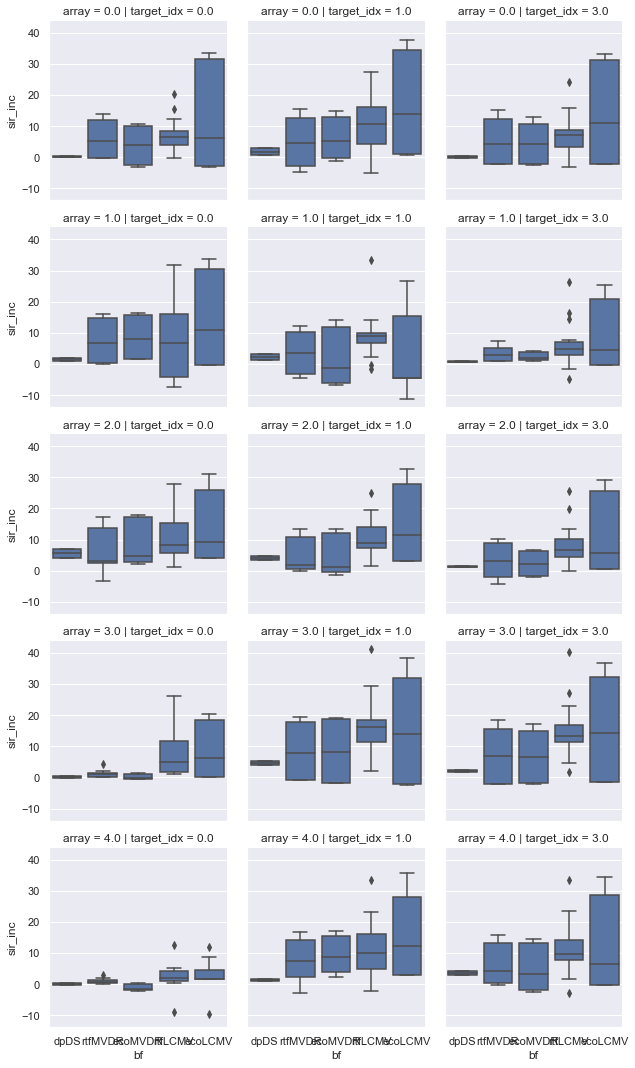

In [79]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


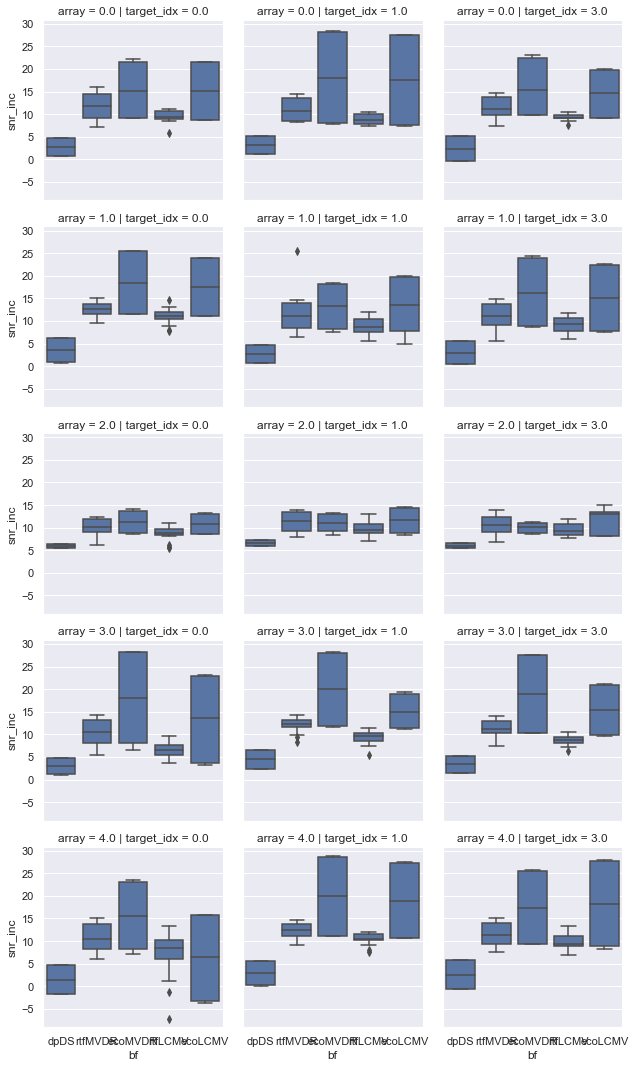

In [80]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

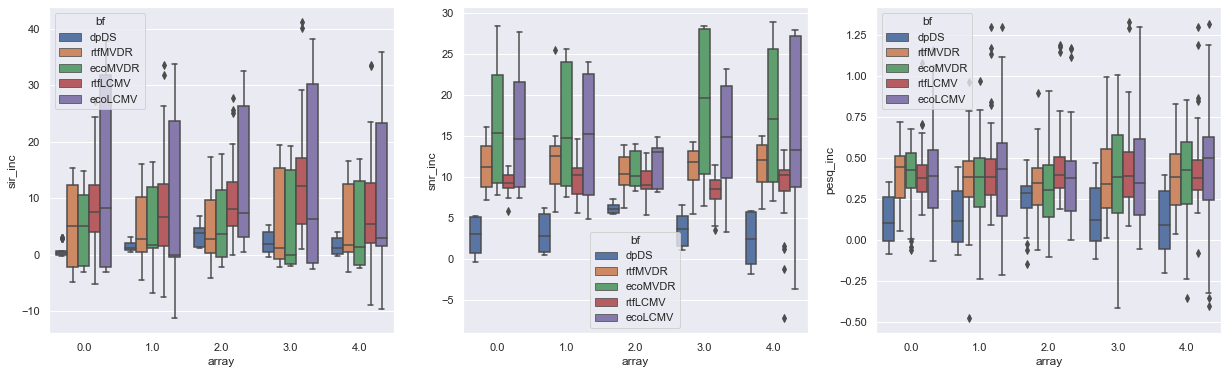

In [81]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
res